In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
train_x = np.linspace(0, 5, 100)
train_y = train_x + np.random.random(100)*2-1

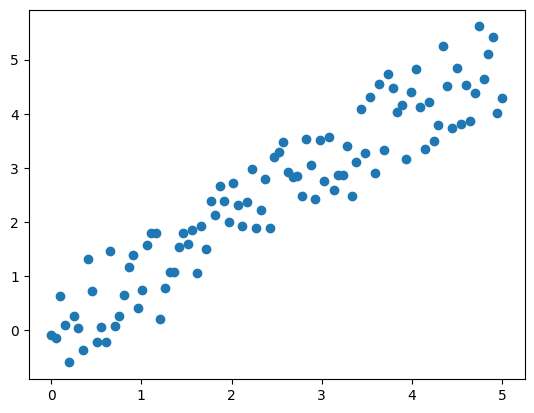

In [ ]:
plt.scatter(train_x, train_y)
plt.show()


In [4]:
train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)
reg = LinearRegression().fit(train_x, train_y)
reg.score(train_x, train_y)

0.8793650731607818

In [5]:
filename = 'model.sav'
pickle.dump(reg, open(filename, 'wb'))

In [6]:
%%writefile test.py
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка обученной модели
filename = 'model.sav'
model = pickle.load(open(filename, 'rb'))

# Первый тестовый набор данных
def test_one():
  test_x_1 = np.linspace(0, 15, 100)
  test_y_1 = test_x_1 + np.random.random(100)*3-2
  test_x_1 = test_x_1.reshape(-1,1)
  test_y_1 = test_y_1.reshape(-1,1)
  assert model.score(test_x_1, test_y_1) > 0.5, "Низкий уровень предсказания!"

# Второй тестовый набор данных
def test_two():
  test_x_2 = np.linspace(0, 10, 100)
  test_y_2 = test_x_2 + np.random.random(100)*4-3
  test_x_2 = test_x_2.reshape(-1,1)
  test_y_2 = test_y_2.reshape(-1,1)
  assert model.score(test_x_2, test_y_2) > 0.5, "Низкий уровень предсказания!"

# Шумовой набор данных
def test_with_noise():
  noise_data_x = np.linspace(0, 15, 100)
  noise_data_y = noise_data_x + np.random.random(100)*3-1
  noise_data_y[25:45] *= -2
  noise_data_x = noise_data_x.reshape(-1,1)
  noise_data_y = noise_data_y.reshape(-1,1)
  assert model.score(noise_data_x, noise_data_y) > 0.5, "Низкий уровень предсказани

Writing test.py


In [7]:
!pytest test.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.3.0
rootdir: /content
plugins: anyio-3.7.1
collected 0 items / 1 error                                                                        

============================================== ERRORS ==============================================
_____________________________________ ERROR collecting test.py _____________________________________
/usr/local/lib/python3.10/dist-packages/_pytest/python.py:617: in _importtestmodule
    mod = import_path(self.path, mode=importmode, root=self.config.rootpath)
/usr/local/lib/python3.10/dist-packages/_pytest/pathlib.py:567: in import_path
    importlib.import_module(module_name)
/usr/lib/python3.10/importlib/__init__.py:126: in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
<frozen importlib._bootstrap>:1050: in _gcd_import
    ???
<frozen importlib._bootstrap